Name : Ilham Muhamad Firdaus    
Student ID : 1103202001

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [55]:
dataset = "Salary.csv"
df = pd.read_csv(dataset)
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [56]:
df=df.drop("Unnamed: 0",axis=1) # Menghapus kolom Unnamed: 0
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [58]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


c:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


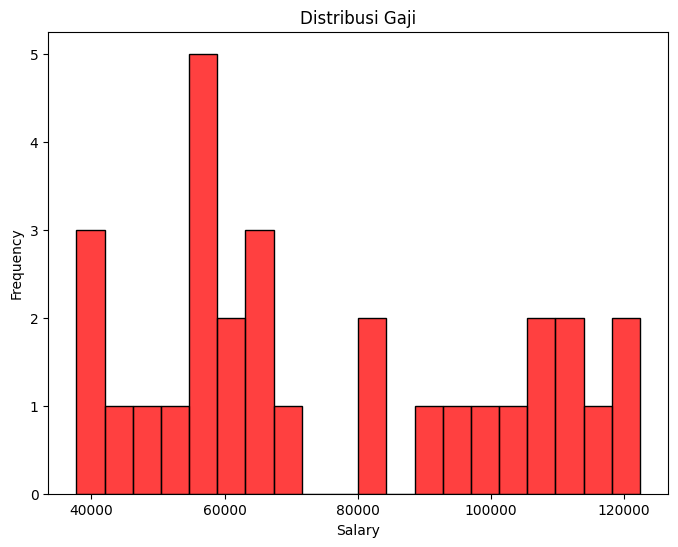

In [59]:
plt.figure(figsize=(8,6))
sns.histplot(df["Salary"],bins=20,color="red")
plt.title("Distribusi Gaji")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

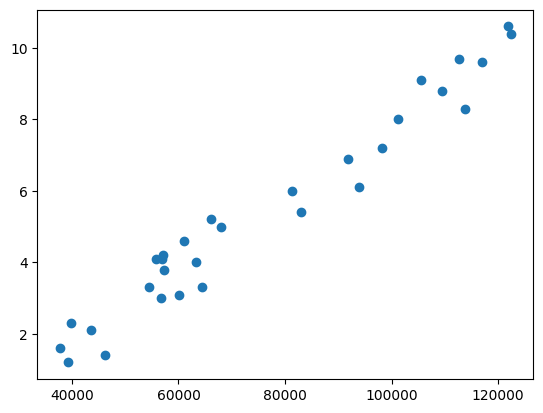

In [60]:
plt.scatter(df["Salary"],df["YearsExperience"])

<Axes: >

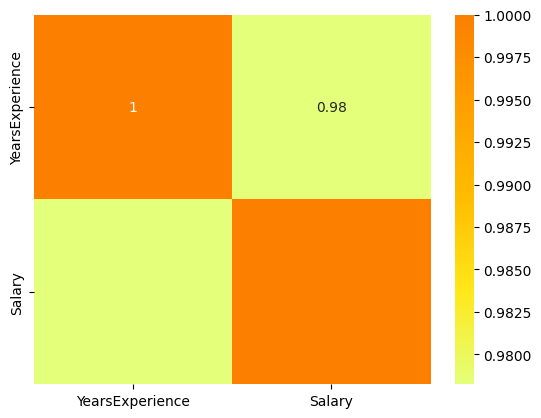

In [61]:
#  Membuat sebuah heatmap
corr=df.corr()
sns.heatmap(corr,annot=True,cmap = 'Wistia')

In [62]:
x = df[["YearsExperience"]] # Feature variable
y = df[["Salary"]] # Target variable

reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [63]:
y_pred=reg.predict(x) # Membuat prediksi
reg.score(x,y) 

0.9569566641435086

In [64]:
# Mencetak koefisien (coef) dan intercept dari model regresi linear (reg)
print(reg.coef_)
print(reg.intercept_)

[[9449.96232146]]
[24848.20396652]


In [65]:
# Melakukan analisis regresi
model=sm.OLS(y,sm.add_constant(x))
result=model.fit()
b,m= result.params
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        19:25:59   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

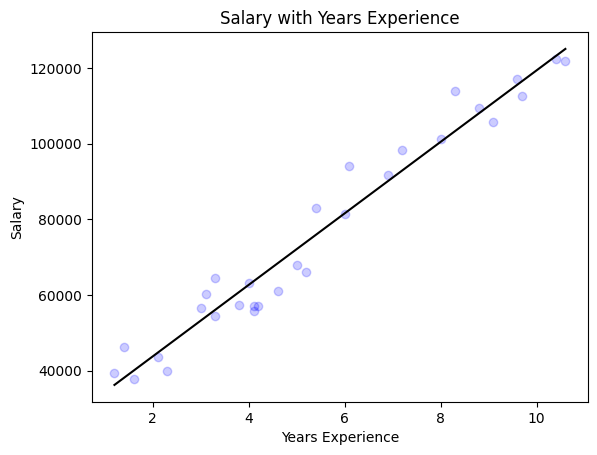

In [66]:
plt.scatter(x,y,alpha=0.2,color="blue")
plt.plot(x,y_pred,color="black")
plt.title("Salary with Years Experience")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()